In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Bynthgjkzwbz

In [2]:
# Interpolation core functions

def MAI(ts, addresses, func, depth=50, mode='center'):
    '''
    depth should be no less than (maximum length of adresses) * 2 + 1
    '''
    arr_res = np.array(ts, copy=True)
    for diapason in addresses:
        for address in range(diapason[0], diapason[1]):
            arr_res[address] = func(ts, address, depth)
    return arr_res
            

def meanval_center(ts, index, depth=50):
    length = len(ts)
    index_l = index - np.min([index, depth//2])
    index_h = index + np.min([length-index, depth//2])
    return np.nanmean(ts[index_l: index_h])

In [3]:
# Addresses specific

df = pd.read_csv('sc_merge_min_6WdR366jgc_KP2.lst', sep="\s+")

df = df.replace({'Scalar_B':{9999.99:np.nan}, 'Flow_speed':{99999.9:np.nan},
                   'Proton_Density':{999.99:np.nan}, 'Temperature':{9999999.0:np.nan},
                'BX_GSE':{9999.99:np.nan}, 'BY_GSE':{9999.99:np.nan}, 'BZ_GSE':{9999.99:np.nan}, 
                 'BY_GSM':{9999.99:np.nan}, 'BZ_GSM':{9999.99:np.nan}, 'Vx':{99999.9:np.nan}, 
                 'Vy':{99999.9:np.nan}, 'Vz':{99999.9:np.nan}})

print(df.head(25))
df.shape

    Year  Day  Hour  Minute  Scalar_B  BX_GSE  BY_GSE  BZ_GSE  BY_GSM  BZ_GSM  \
0   2014    1     0       0      5.03   -1.07    4.28   -2.39    4.75   -1.22   
1   2014    1     0       1      5.03   -1.00    4.31   -2.39    4.78   -1.21   
2   2014    1     0       2      5.02   -1.11    4.29   -2.35    4.75   -1.18   
3   2014    1     0       3      5.06   -1.15    4.14   -2.66    4.68   -1.52   
4   2014    1     0       4      5.10   -0.98    4.27   -2.60    4.79   -1.43   
5   2014    1     0       5      4.99   -1.05    3.98   -2.81    4.56   -1.70   
6   2014    1     0       6      5.02   -0.95    3.76   -3.17    4.44   -2.11   
7   2014    1     0       7      5.02   -1.05    3.42   -3.51    4.20   -2.53   
8   2014    1     0       8      5.05   -1.02    3.25   -3.70    4.08   -2.75   
9   2014    1     0       9      4.86   -0.45    4.55   -1.46    4.77   -0.26   
10  2014    1     0      10      4.94   -0.26    4.77   -1.16    4.91    0.09   
11  2014    1     0      11 

(525600, 16)

In [4]:
# Scalar_B-like series
Scalar_B = df['Scalar_B'].to_numpy()
BX_GSE = df['BX_GSE'].to_numpy()
BY_GSE = df['BY_GSE'].to_numpy()
BZ_GSE = df['BZ_GSE'].to_numpy()
BY_GSM = df['BY_GSM'].to_numpy()
BZ_GSM = df['BZ_GSM'].to_numpy()
Vx = df['Vx'].to_numpy()
Vy = df['Vy'].to_numpy()
Vz = df['Vz'].to_numpy()
# Proton_Density-like series
# Proton_Density = df['Proton_Density'].to_numpy()
# Flow_speed = df['Flow_speed'].to_numpy()
# Temperature = df['Temperature'].to_numpy()

In [5]:
def get_addresses(ts, smallest=1, biggest=50):
    idxs_missing = np.argwhere(np.isnan(ts) == False).T[0]
    idx_diff_missing = idxs_missing[1:] - idxs_missing[:-1]
    idx_diff_missing = idx_diff_missing - 1
    idx_diff_missing_nz = idx_diff_missing[np.nonzero(idx_diff_missing)]
    arr_index = np.argwhere((idx_diff_missing <= biggest) * (idx_diff_missing >= smallest) != 0).T[0]
    addresses = []

    for i in arr_index:
        start = idxs_missing[i] + 1
        stop = idxs_missing[i+1]
        addresses.append([start, stop])
    addresses = np.array(addresses)
    return addresses

In [6]:
# Applying to data

In [7]:
ts = BX_GSE
adrs = get_addresses(ts, smallest=1, biggest=50)

In [8]:
resulting_ts = MAI(ts, adrs, meanval_center, 101)

In [9]:
np.argwhere(np.isnan(resulting_ts)).shape

(61914, 1)

In [10]:
resulting_ts.shape

(525600,)

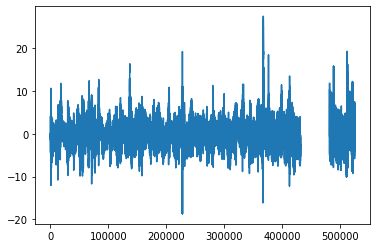

In [11]:
plt.plot(resulting_ts)

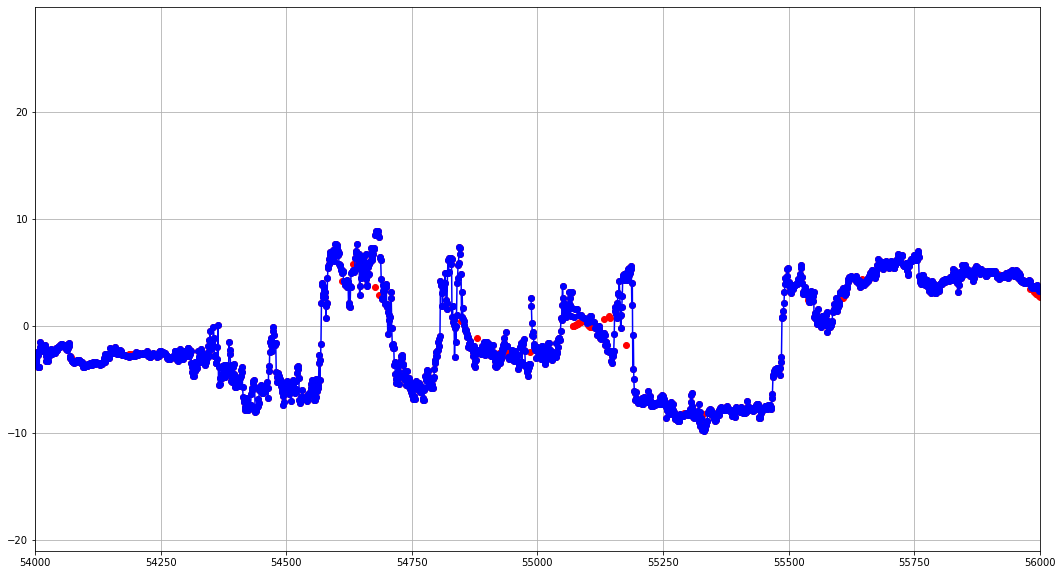

In [12]:
plt.figure(figsize=(18,10))
plt.plot(resulting_ts, 'ro')
plt.plot(ts, 'bo-')
t=54000
plt.xlim((t,t+2000))
plt.grid()
# plt.savefig('/home/m/Desktop/pic.pdf', format='pdf')

In [13]:
# Getting uninterrupted data

In [14]:
def get_uninterrupted_addr(ts, smallest=1, biggest=500000):
    idxs_missing = np.argwhere(np.isnan(ts) == True).T[0]
    idx_diff_missing = idxs_missing[1:] - idxs_missing[:-1]
    idx_diff_missing = idx_diff_missing - 1
    idx_diff_missing_nz = idx_diff_missing[np.nonzero(idx_diff_missing)]
    arr_index = np.argwhere((idx_diff_missing <= biggest) * (idx_diff_missing >= smallest) != 0).T[0]
    addresses = []

    for i in arr_index:
        start = idxs_missing[i] + 1
        stop = idxs_missing[i+1]
        addresses.append([start, stop])
    addresses = np.array(addresses)
    return addresses

def get_uninterrupted_data(ts, addresses):
    data = []
    for address in addresses:
        data.append(ts[address[0]:address[1]])
    return data

In [15]:
uninterrupted_addresses = get_uninterrupted_addr(resulting_ts, smallest=1000, biggest=500000)
uninterrupted_data = get_uninterrupted_data(resulting_ts, uninterrupted_addresses)
uninterrupted_data

[array([-4.69, -4.72, -4.67, ..., -1.96, -2.02, -2.01]),
 array([-1.77, -1.63, -1.49, ..., -3.07, -3.21, -2.92]),
 array([-1.36  , -0.9748, -1.5   , ..., -3.17  , -3.78  , -3.68  ]),
 array([-3.38, -3.36, -4.35, ...,  2.27,  2.27,  2.25]),
 array([ 2.99,  2.95,  2.85, ..., -5.38, -5.32, -5.34]),
 array([-4.82     , -4.7412766, -4.84     , ...,  4.07     ,  3.9      ,
         3.89     ]),
 array([ 3.71   ,  3.28875,  3.58   , ..., -2.67   , -2.67   , -2.62   ]),
 array([-3.05, -3.06, -3.05, ..., -1.81, -1.84, -1.92]),
 array([-0.67, -0.68, -1.2 , ...,  2.96,  2.99,  3.  ]),
 array([ 3.08,  3.07,  3.1 , ..., 15.52, 15.52, 15.51]),
 array([ 8.02,  8.07,  8.08, ..., -2.34, -2.6 , -2.61]),
 array([-1.83, -1.83, -1.84, ...,  3.4 ,  3.71,  3.75]),
 array([ 4.61,  4.64,  4.58, ..., -2.13, -2.21, -2.27]),
 array([-0.79,  1.21,  0.45, ...,  2.84,  2.83,  2.83]),
 array([2.81, 2.77, 2.75, ..., 5.37, 5.32, 5.3 ]),
 array([2.16, 2.42, 2.42, ..., 3.31, 3.34, 3.31]),
 array([ 2.68,  2.61,  2.64, ...

In [16]:
uninterrupted_addresses

array([[  4359,   7263],
       [  7485,  10482],
       [ 10690,  12567],
       [ 12639,  20788],
       [ 20969,  53426],
       [ 53571,  68665],
       [ 69232, 106454],
       [106633, 107783],
       [107877, 127072],
       [127454, 137183],
       [138108, 143511],
       [143569, 148951],
       [149210, 173282],
       [173484, 209669],
       [210116, 226764],
       [226974, 229773],
       [229932, 232660],
       [233395, 246884],
       [247159, 249310],
       [249985, 304220],
       [304450, 322264],
       [323202, 351119],
       [351596, 366406],
       [366632, 396040],
       [397076, 409975],
       [410150, 413054],
       [413123, 417833],
       [418093, 431920],
       [481930, 483813],
       [484522, 491927],
       [491985, 497034],
       [498116, 515669],
       [515903, 523910]])

In [17]:
lengths = [len(item) for item in uninterrupted_data]

In [18]:
lengths

[2904,
 2997,
 1877,
 8149,
 32457,
 15094,
 37222,
 1150,
 19195,
 9729,
 5403,
 5382,
 24072,
 36185,
 16648,
 2799,
 2728,
 13489,
 2151,
 54235,
 17814,
 27917,
 14810,
 29408,
 12899,
 2904,
 4710,
 13827,
 1883,
 7405,
 5049,
 17553,
 8007]

In [19]:
from teaspoon.parameter_selection.MI_delay import MI_for_delay

from nolds import lyap_r, lyap_e

from nolitsa import dimension

In [20]:
def process_ts(ts, window=1000, step=50):
    
    # get the window size

    idxs = [[start, stop] for start, stop in zip(range(0, ts.shape[0], step), range(window, ts.shape[0], step))]
    idxs = np.array(idxs)

    lyap_rs = []
    lyap_es = []
    ns = []
    taus = []

    dims = np.arange(1, 12)

    # loop the window through ts

    for idx in idxs:
        try:
            tau = MI_for_delay(ts[idx[0]: idx[1]], method='kraskov 2')
            E, Es = dimension.afn(ts[idx[0]: idx[1]], tau=tau, dim=dims)
            E1, E2 = E[1:] / E[:-1], Es[1:] / Es[:-1]
            dim = dims[np.argwhere(np.abs(E1 - 1) < 0.2)[0,0]]

            le = lyap_e(ts[idx[0]: idx[1]], emb_dim=dim, tau=tau, matrix_dim=dim)
            lr = lyap_r(ts[idx[0]: idx[1]], emb_dim=dim, tau=tau)

            taus.append(tau)
            ns.append(dim)
            lyap_es.append(le)
            lyap_rs.append(lr)
        except:
            taus.append(np.nan)
            ns.append(np.nan)
            lyap_es.append(np.nan)
            lyap_rs.append(np.nan)

    out = {
        'window': window,
        'step': step,
        't': idxs[:, 1],
        'dimension': ns,
        'delay': taus,
        'rosenstein_lyapunov': lyap_rs,
        'eckmann_lyapunov': lyap_es
    }
    
    return out

In [ ]:
results = []

for item in uninterrupted_data:
    try:
        results.append(process_ts(item, window=1000, step=1))
    except:
        results.append({})

/home/m/anaconda3/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 250
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/m/anaconda3/lib/python3.7/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 115
  warnings.warn(msg.format(lag), RuntimeWarning)
/home/m/anaconda3/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 250
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/m/anaconda3/lib/python3.7/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 115
  warnings.warn(msg.format(lag), RuntimeWarning)
/home/m/anaconda3/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 250
  warnings.warn(msg.format(min_tsep), 

/home/m/anaconda3/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 250
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/m/anaconda3/lib/python3.7/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 115
  warnings.warn(msg.format(lag), RuntimeWarning)
/home/m/anaconda3/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 250
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/m/anaconda3/lib/python3.7/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 115
  warnings.warn(msg.format(lag), RuntimeWarning)
/home/m/anaconda3/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 250
  warnings.warn(msg.format(min_tsep), 

/home/m/anaconda3/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 250
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/m/anaconda3/lib/python3.7/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 115
  warnings.warn(msg.format(lag), RuntimeWarning)
/home/m/anaconda3/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 250
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/m/anaconda3/lib/python3.7/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 115
  warnings.warn(msg.format(lag), RuntimeWarning)
/home/m/anaconda3/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 250
  warnings.warn(msg.format(min_tsep), 

/home/m/anaconda3/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 250
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/m/anaconda3/lib/python3.7/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 115
  warnings.warn(msg.format(lag), RuntimeWarning)
/home/m/anaconda3/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 250
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/m/anaconda3/lib/python3.7/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 115
  warnings.warn(msg.format(lag), RuntimeWarning)
/home/m/anaconda3/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 250
  warnings.warn(msg.format(min_tsep), 

/home/m/anaconda3/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 250
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/m/anaconda3/lib/python3.7/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 115
  warnings.warn(msg.format(lag), RuntimeWarning)


In [ ]:
np.sum(np.isnan(uninterrupted_data[4]))

In [ ]:
results

In [ ]:
import pickle
with open('uninterrupted_BX_GSE.pkl', 'wb') as pkl:
    pickle.dump(results, pkl)

In [ ]:
import pickle
with open('uninterrupted_BX_GSE.pkl', 'rb') as pkl:
    read_res = pickle.load(pkl)